# Telecom Customer Churn

WELCOME TO EXAM MODULE 3! :) You're super great that you're here already. Now, buckle up!

Data yang digunakan pada exam ini adalah data Customer Churn dari suatu perusahaan telekomunikasi.

Customer Churn adalah fenomena ketika customer pergi meninggalkan produk kita. Tentu kita tidak menginginkan customer untuk berhenti menggunakan produk kita, kan? 

Inilah tantangannya! Kita akan mencoba memprediksi apakah customer akan churn atau tidak. 

The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

<b> Coloumns Descriptions  </b>
- customerID = Customer ID
- gender = Whether the customer is a male or a female
- SeniorCitizen = Whether the customer is a senior citizen or not (1, 0)
- Partner = Whether the customer has a partner or not (Yes, No)
- Dependents = Whether the customer has dependents or not (Yes, No)
- tenure = Number of months the customer has stayed with the company
- PhoneService = Whether the customer has a phone service or not (Yes, No)
- MultipleLines = Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService = Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity = Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup = Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection = Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport = Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV = Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies = Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract = The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling = Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod = The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges = The amount charged to the customer monthly
- TotalCharges = The total amount charged to the customer
- Churn = Whether the customer churned or not (Yes or No)

In this exam, the maximum point is 100 with the criterion is shown below:
- Q1 Data Preparation: 15 point
- Q2 Data Visualization: 35 point
- Q3 Classification Modelling: 20 point
- Q4 Perbaikan Modelling: 30 point

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('Churn_ujian.csv')

In [ ]:
# tulislah code yang mengeluarkan output seperti di bawah ini

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# tulislah code yang mengeluarkan output seperti di bawah ini
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [ ]:
# tulislah code yang mengeluarkan output seperti di bawah ini
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# tulislah code yang mengeluarkan output seperti di bawah ini

dfDesc = []
for item in df.columns :
    dfDesc.append([item, df[item].count(), df[item].nunique(),df[item].max(),df[item].unique()])
pd.DataFrame(dfDesc, columns = ['dataType','count','unique','top','freq'])

,count,unique,top,freq
customerID,7043,7043,3648-GZPHF,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [ ]:
# tulislah code yang mengeluarkan output seperti di bawah ini

df.drop_duplicates().sample(2).values
dfDesc = []
for item in df.columns :
    dfDesc.append([item,df[item].dtypes, df[item].isna().sum(), round((df[item].isna().sum()/len(df))*100,2), df[item].nunique(),df[item].drop_duplicates().sample(2).values])
pd.DataFrame(dfDesc, columns = ['dataFeatures','dataType','null','nullPct','unique','uniqueSample'])

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,customerID,object,0,0.0,7043,"[5149-QYTTU, 4695-WJZUE]"
1,gender,object,0,0.0,2,"[Male, Female]"
2,SeniorCitizen,int64,0,0.0,2,"[0, 1]"
3,Partner,object,0,0.0,2,"[No, Yes]"
4,Dependents,object,0,0.0,2,"[Yes, No]"
5,tenure,int64,0,0.0,73,"[2, 33]"
6,PhoneService,object,0,0.0,2,"[Yes, No]"
7,MultipleLines,object,0,0.0,3,"[Yes, No]"
8,InternetService,object,0,0.0,3,"[Fiber optic, DSL]"
9,OnlineSecurity,object,0,0.0,3,"[No, No internet service]"


#Q1: Data Preparation (15 point)

## 1. Ubahlah format dari kolom yang menurutmu perlu diubah! (Perlu diingat bahwa untuk membuat modelling machine learning diperlukan data yang memiliki format numerik seluruhnya).
## 2. Adakah missing value pada data tersebut? Jika ada, apakah perlu dilakukan penghapusan missing value?
## 3. Lakukan step data preparation APAPUN yang belum dilakukan di nomor 1 dan 2 di atas.


In [ ]:
# Tulis jawaban Q1 di cell ini. TIDAK TERBATAS HANYA 1 CELL SAJA. Jika kurang, silahkan tambah cell sesuai kebutuhan.

In [ ]:
#I found that there are no NaN Value (Missing Value) in the data, so that we don't have to drop any missing value
df.isnull()

In [ ]:
#1.Data visualization using LINE CHART 

x = 'TotalCharges'
y = 'Churn'

plt.plot(x,y,'r')
plt.xlabel('Total Charges')
plt.ylabel('Churn')
plt.title('Churn or Not Churn')
plt.show()

#THE RELATIONSIP BETWEEN CHURN OR NOT CHURN AND TOTAL CHARGES 
#Result Analysis : Here we find that if the total charges are expensive, then it will increase the potential customer to stop using our product. 

In [ ]:
#2.Data visualization using BOX PLOT
figure = plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='Churn',y='MonthlyCharges')
plt.tight_layout()

#THE RELATIONSHIP BETWEEN CHURN OR NOT CHURN AND MONTHLY CHARGES 
#Result Analysis : Here we find that if the monthly charges are expensive, then it will increase the potential customer to stop using our product. If the monthly charges is near to 100, then the higher potential for customer churn.
#This is happen perhaps because the customer don't want to pay an expensive service and if that so they will find another competitor

In [ ]:
#3.Data Visualization using Histogram 

x = 'tenure'
sns.distplot(x)
plt.title('The Relationship Between Tenure and Customer Churn')

#THE RELATIONSHIP BETWEEN TENURE AND CUSTOMER CHURN 
#Result Analysis : Here we find that the higher tenure means that customer still loyal to our product. 
#This is happen perhaps because we still maintain the prices, so that the it will maintain the loyal customers

#Q2: Data Visualization (35 point)

##1. Tampilkan visualisasi LINE CHART variabel apapun yang kamu inginkan. Lalu, analisis hasilnya.

##2. Tampilkan visualisasi BOX PLOT dari variabel apapun yang kamu inginkan TERHADAP target variabel "Churn Or Not Churn". Lalu, analisis hasilnya. CONTOH GAMBARANNYA SEPERTI DI BAWAH INI.
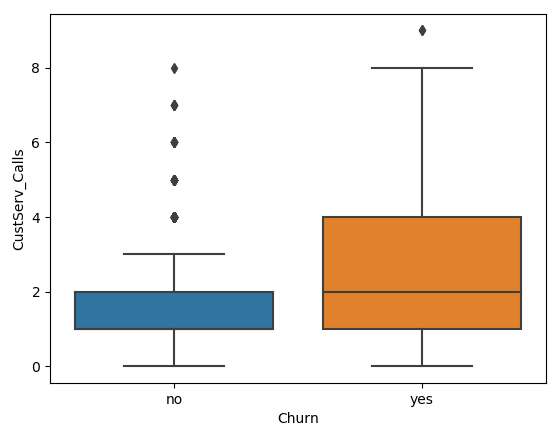

##3. Tampilkan visualisasi HISTOGRAM dengan variabel apapun yang kamu inginkan TERHADAP target variabel "Churn Or Not Churn". CONTOH GAMBAR SEBAGAI BERIKUT.

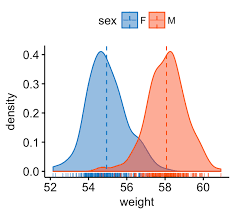


#Q3: Classification Modelling (20 point)

## **Tujuan**: Memprediksi apakah customer akan churn atau tidak churn. Kolom target variabel berjudul "Churn".

## **Metric evaluation**: Tergantung pembuat modelling, yaitu kamu. Gunakan alasan yang tepat mengapa memilih metric evaluation tersebut. Beberapa contoh metric evaluation -> Accuracy, Precision, Recall, etc.

## **Algoritma**: Buatlah modelling dengan minimal 2 algoritma yang berbeda. Contoh: Logistic regression & random forest. Semakin banyak algoritma yang digunakan, maka semakin bisa membandingkan kebaikan model tersebut.

## **Expected Output**: Modelling & metric evaluation.



In [ ]:
# Tulis jawaban Q3 di cell ini. TIDAK TERBATAS HANYA 1 CELL SAJA. Jika kurang, silahkan tambah cell sesuai kebutuhan.

In [ ]:
figure = plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)

In [ ]:
y = df['Churn']
x = df[['MonthlyCharges','tenure','SeniorCitizen']]

In [ ]:
x = pd.get_dummies(x,columns=['MonthlyCharges','tenure'])

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
def classicRegression(x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=101)
    
    algo = [Lasso,Ridge,LinearRegression]
    model = []
    scores = []
    for item in algo:
        model.append(item())
    
    for item in model :
        item.fit(x_train,y_train)
        prediction = item.predict(x_test)
        mae = metrics.mean_absolute_error(y_test,prediction)
        mse = metrics.mean_squared_error(y_test,prediction)
        rmse = np.sqrt(metrics.mean_squared_error(y_test,prediction))
        temp = [mae,mse,rmse]
        scores.append(temp)
    df = pd.DataFrame(scores,columns=['MAE','RMSE','MSE'],index=['Lasso','Ridge','LinearRegression'])
    return df

In [ ]:
classicRegression(x,y)

#Q4: Perbaikan Model (30 point)

## Pada question 4 ini, perbaiki model yang sudah kalian buat pada Q3 di atas.
## Clue: Bisa dilakukan:
##- hyperparameter tuning
##- memasukkan hanya feature yang paling penting ke dalam model (feature importance)
##- check imbalanced target
##- scaling
##- encoding

#HAPPY TUNING :)

In [ ]:
# Tulis jawaban Q3 di cell ini. TIDAK TERBATAS HANYA 1 CELL SAJA. Jika kurang, silahkan tambah cell sesuai kebutuhan.